In [16]:
import pandas as pd
import numpy as np

d = {"russell": {"score": np.random.rand(), "ping": np.random.randint(10, 100)},
    "cantor": {"score": np.random.rand(), "ping": np.random.randint(10, 100)},
    "godel": {"score": np.random.rand(), "ping": np.random.randint(10, 100)}}

print "type d", type(d)
print "--"*10

print "pd.Series(d)--\n", pd.Series(d)
print "--"*10

df=pd.DataFrame(d)

print "df---\n",df
print "--"*10
df_unstack=df.unstack()
print "df_unstack---\n",df_unstack


type d <type 'dict'>
--------------------
pd.Series(d)--
cantor       {u'score': 0.10681356781, u'ping': 88}
godel       {u'score': 0.724306444216, u'ping': 19}
russell    {u'score': 0.0730361751991, u'ping': 23}
dtype: object
--------------------
df---
          cantor      godel    russell
ping   88.000000  19.000000  23.000000
score   0.106814   0.724306   0.073036
--------------------
df_unstack---
cantor   ping     88.000000
         score     0.106814
godel    ping     19.000000
         score     0.724306
russell  ping     23.000000
         score     0.073036
dtype: float64


In [17]:
#To swap levels in MultiIndex
print "df---\n",df
print "--"*10
df_stack=df.stack()
print "df_stack-----\n", df_stack

df---
          cantor      godel    russell
ping   88.000000  19.000000  23.000000
score   0.106814   0.724306   0.073036
--------------------
df_stack-----
ping   cantor     88.000000
       godel      19.000000
       russell    23.000000
score  cantor      0.106814
       godel       0.724306
       russell     0.073036
dtype: float64


In [20]:
df_stack['ping']

cantor     88.0
godel      19.0
russell    23.0
dtype: float64

In [22]:
print type(df_stack['score'])

<class 'pandas.core.series.Series'>


In [76]:
df_stack['score'].to_dict().values()

[0.72430644421641488, 0.10681356781015272, 0.073036175199064801]

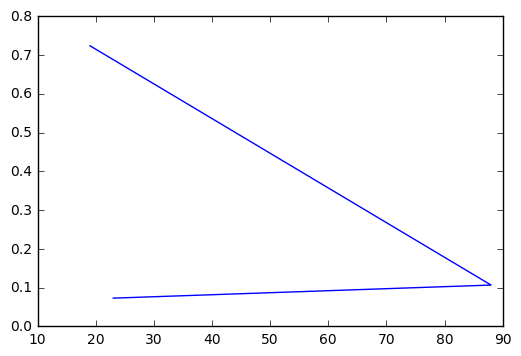

In [79]:
#can I plot with these two colums?
import math 
import pandas as pd
import pylab as pl
from IPython.display import display
%matplotlib inline

pl.plot (df_stack['ping'].to_dict().values(), df_stack['score'].to_dict().values())

# Access nested dictionary items via a list of keys?

http://stackoverflow.com/questions/14692690/access-nested-dictionary-items-via-a-list-of-keys

In [29]:
dataDict = {
    "a":{
        "r": 1,
        "s": 2,
        "t": 3
        },
    "b":{
        "u": 1,
        "v": {
            "x": 1,
            "y": 2,
            "z": 3
        },
        "w": 3
        }
}    

maplist = ["a", "r"]

In [71]:
import pprint
pprint.pprint(dataDict)
print dataDict.keys()

{'a': {'r': 1, 's': 2, 't': 3},
 'b': {'u': 1, 'v': {'w': 4, 'x': 1, 'y': 2, 'z': 3}, 'w': 3}}
['a', 'b']


In [ ]:
from functools import reduce  # forward compatibility for Python 3
#https://docs.python.org/2/library/functions.html#reduce
import operator #https://docs.python.org/2/library/operator.html


In [73]:
#operator.getitem(a, b)
#Return the value of a at index b.

operator.getitem(0,dataDict)


TypeError: 'int' object has no attribute '__getitem__'

In [36]:

def getFromDict(dataDict, mapList):
    return reduce(operator.getitem, mapList, dataDict)

def setInDict(dataDict, mapList, value): 
    for k in mapList[:-1]: dataDict = dataDict[k]
    dataDict[mapList[-1]] = value

In [37]:
getFromDict(dataDict, ["a", "r"])

1

In [38]:
getFromDict(dataDict, ["b", "v", "y"])


2

In [40]:
setInDict(dataDict, ["b", "v", "w"], 4)

In [42]:
import pprint
pprint.pprint(dataDict)

{'a': {'r': 1, 's': 2, 't': 3},
 'b': {'u': 1, 'v': {'w': 4, 'x': 1, 'y': 2, 'z': 3}, 'w': 3}}


# Understand 
maxQidx=max(self.Q[self.state].iteritems(), key=operator.itemgetter(1))[0]

In [43]:
Q={('forward', 'green', None, None, None): {None: 0.0,
                                          'forward': 19.044206782279666,
                                          'left': 0.0,
                                          'right': 0.0},
 ('forward', 'green', None, 'forward', None): {None: 0.0,
                                               'forward': 0.884939212763202,
                                               'left': 0.0,
                                               'right': 0.0},
 ('forward', 'green', 'forward', None, None): {None: 0.0,
                                               'forward': 1.2179544999686898,
                                               'left': 0.0,
                                               'right': 0.0}
}

import pprint
pprint.pprint(Q)

{('forward', 'green', None, None, None): {None: 0.0,
                                          'forward': 19.044206782279666,
                                          'left': 0.0,
                                          'right': 0.0},
 ('forward', 'green', None, 'forward', None): {None: 0.0,
                                               'forward': 0.884939212763202,
                                               'left': 0.0,
                                               'right': 0.0},
 ('forward', 'green', 'forward', None, None): {None: 0.0,
                                               'forward': 1.2179544999686898,
                                               'left': 0.0,
                                               'right': 0.0}}


In [52]:
#maxQidx=max(self.Q[self.state].iteritems(), key=operator.itemgetter(1))[0]
print type(Q)
print Q.keys()

<type 'dict'>
[('forward', 'green', None, None, None), ('forward', 'green', 'forward', None, None), ('forward', 'green', None, 'forward', None)]


In [56]:
dict1=Q[('forward', 'green', None, None, None)]

{None: 0.0, 'forward': 19.044206782279666, 'left': 0.0, 'right': 0.0}

In [59]:
dict2=Q[('forward', 'green', None, None, None)].values()
print dict2

[19.044206782279666, 0.0, 0.0, 0.0]


In [62]:
dict3=Q[('forward', 'green', None, None, None)].iteritems()
print dict3

AttributeError: 'dictionary-itemiterator' object has no attribute 'values'

In [60]:
print max(dict2,key=operator.itemgetter(1))[0]

TypeError: 'float' object has no attribute '__getitem__'

In [64]:
MyCount= {u'10': 1, u'1': 2, u'3': 2, u'2': 2, u'5': 2, u'4': 2, u'7': 2, u'6': 2, u'9': 2, u'8': 2}
pprint.pprint(MyCount)

{u'1': 2,
 u'10': 1,
 u'2': 2,
 u'3': 2,
 u'4': 2,
 u'5': 2,
 u'6': 2,
 u'7': 2,
 u'8': 2,
 u'9': 2}


In [65]:
print MyCount.keys()

[u'1', u'10', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8']


In [66]:
max(MyCount.keys(), key=int)

u'10'

In [67]:
import operator
stats = {'a':1000, 'b':3000, 'c': 100}
max(stats.iteritems(), key=operator.itemgetter(1))[0]

'b'

In [70]:
operator.itemgetter(1)